In [24]:
# system
import os

# data
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# visualization
import matplotlib.pyplot as plt

### data

In [2]:
df_pre = pd.read_csv("https://raw.githubusercontent.com/gilbutITbook/080228/master/deeplearning/dataset/wine.csv", header=None)
df = df_pre.sample(frac=1)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
3992,6.4,0.17,0.34,1.5,0.093,43.0,136.0,0.99380,3.25,0.49,9.6,6,0
5586,7.3,0.23,0.41,14.6,0.048,73.0,223.0,0.99863,3.16,0.71,9.4,6,0
2830,7.9,0.41,0.37,4.5,0.030,40.0,114.0,0.99200,3.17,0.54,12.4,7,0
2398,6.0,0.18,0.31,1.4,0.036,14.0,75.0,0.99085,3.34,0.58,11.1,8,0
4349,5.8,0.17,0.34,1.8,0.045,96.0,170.0,0.99035,3.38,0.90,11.8,8,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 3992 to 4649
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


- 0: 주석산 농도
- 1: 아세트산 농도
- 2: 구연산 농도
- 3: 잔류 당분 농도
- 4: 염화나트륨 농도
- 5: 유리 아황산 농도
- 6: 총 아황산 농도
- 7: 밀도
- 8: pH
- 9: 황상칼륨 농도
- 10: 알코올 도수
- 11: 와인의 맛 (0 ~ 10 등급)
- 12: class (1: 레드와인, 0: 화이트 와인)

In [14]:
X = df.values[:, :12]
Y = df.values[:, 12]

In [16]:
def new_model():
    model = Sequential()
    model.add(Dense(30, input_dim=12, activation="relu"))
    model.add(Dense(12, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

### model

In [ ]:
model = new_model()

In [ ]:
model.summary()

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(X, Y, batch_size=200, epochs=200)

In [ ]:
print("Train Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

### 모델 저장하기 per epoch

In [9]:
model_dir = "model"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

model_path = model_dir + "/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=model_path, monitor="val_loss", verbose=1, save_best_only=True)


metrics

- train set 오차: loss
- test set 오차: val_loss
- 학습 정확도: acc
- test set 정확도: val_acc

In [10]:
model = new_model()

In [13]:
model.fit(X, Y, validation_split=0.2, batch_size=200, epochs=200, verbose=0, callbacks=[checkpointer])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

### 그래프로 확인하기

적절한 epoch 설정에 대하여

In [17]:
df = df_pre.sample(frac=0.15)

In [18]:
model = new_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X, Y, validation_split=0.33, batch_size=500, epochs=3500)

Epoch 1/3500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/9 [==>...........................] - ETA: 0s - loss: 0.4027 - accuracy: 0.7900WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000020592A4EAF8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

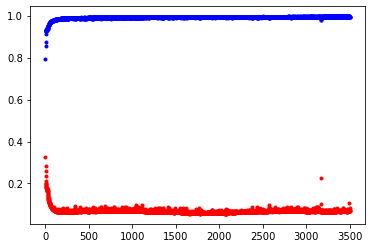

In [21]:
y_vloss = history.history["val_loss"]
y_acc = history.history["accuracy"]

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()

### 학습 자동 중단

In [25]:
np.random.seed(3)
tf.random.set_seed(3)

In [26]:
early_stopping = EarlyStopping(monitor="val_loss", patience=100)

In [27]:
model = new_model()

In [28]:
history = model.fit(X, Y, validation_split=0.2, batch_size=500, epochs=2000, callbacks=[early_stopping])

Epoch 1/2000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/11 [=>............................] - ETA: 0s - loss: 1.8244 - accuracy: 0.7600WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000020595D331F8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

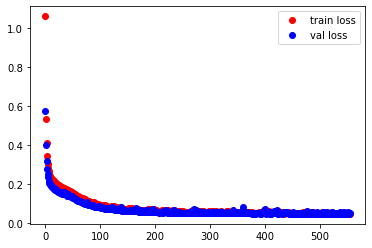

In [33]:
y_loss = history.history["loss"]
y_vloss = history.history["val_loss"]

x_range = np.arange(len(y_loss))
plt.plot(x_range, y_loss, "o", c="red", label="train loss")
plt.plot(x_range, y_vloss, "o", c="blue", label="val loss")

plt.legend(loc="best")
plt.show()